### Etude des variables dans la catégorie solvabilité

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data.columns.tolist()
# Supprimer les espaces en trop autour des noms de colonnes
data.columns = data.columns.str.strip()

In [5]:
efficacite = [
    "Inventory and accounts receivable/Net value",
    "Total Asset Turnover",
    "Accounts Receivable Turnover",
    "Average Collection Days",
    "Inventory Turnover Rate (times)",
    "Fixed Assets Turnover Frequency",
    "Net Worth Turnover Rate (times)",
    "Revenue per person",
    "Operating profit per person",
    "Allocation rate per person",
    "Current Asset Turnover Rate",
    "Quick Asset Turnover Rate",
    "Working capitcal Turnover Rate",
    "Cash Turnover Rate"
]


data_solv = data[[col for col in data.columns if col in efficacite]]
len(efficacite)

14

<Axes: >

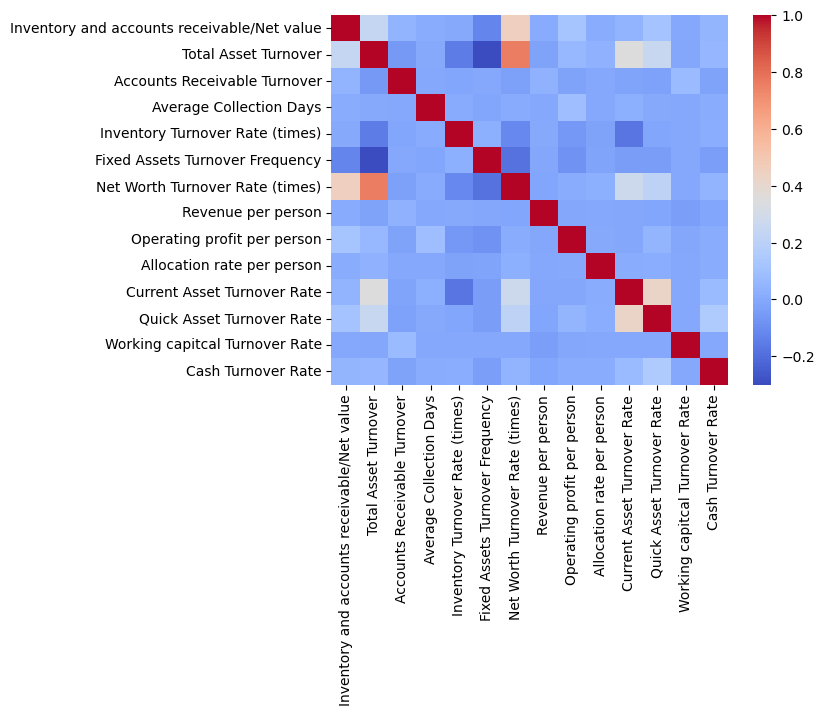

In [6]:
corr = data_solv.corr()
sns.heatmap(corr, cmap='coolwarm')

8.465389472016778


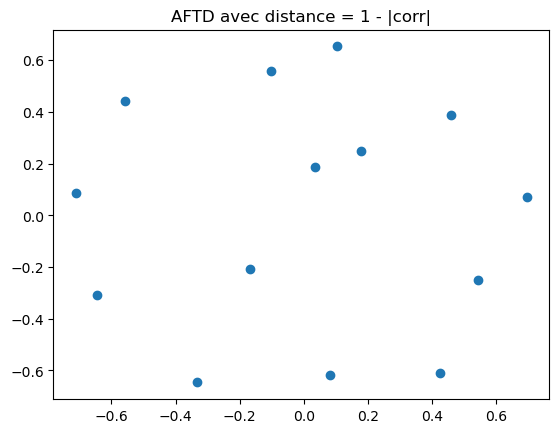

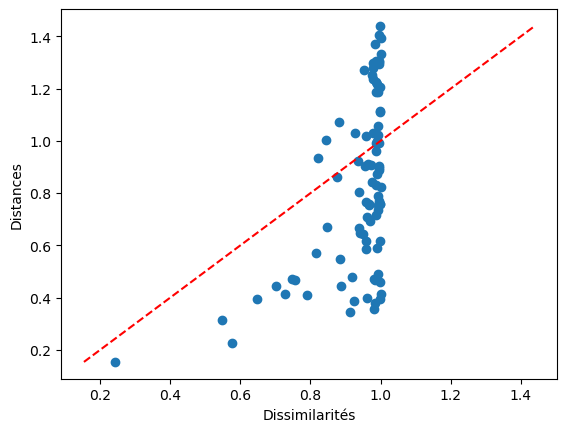

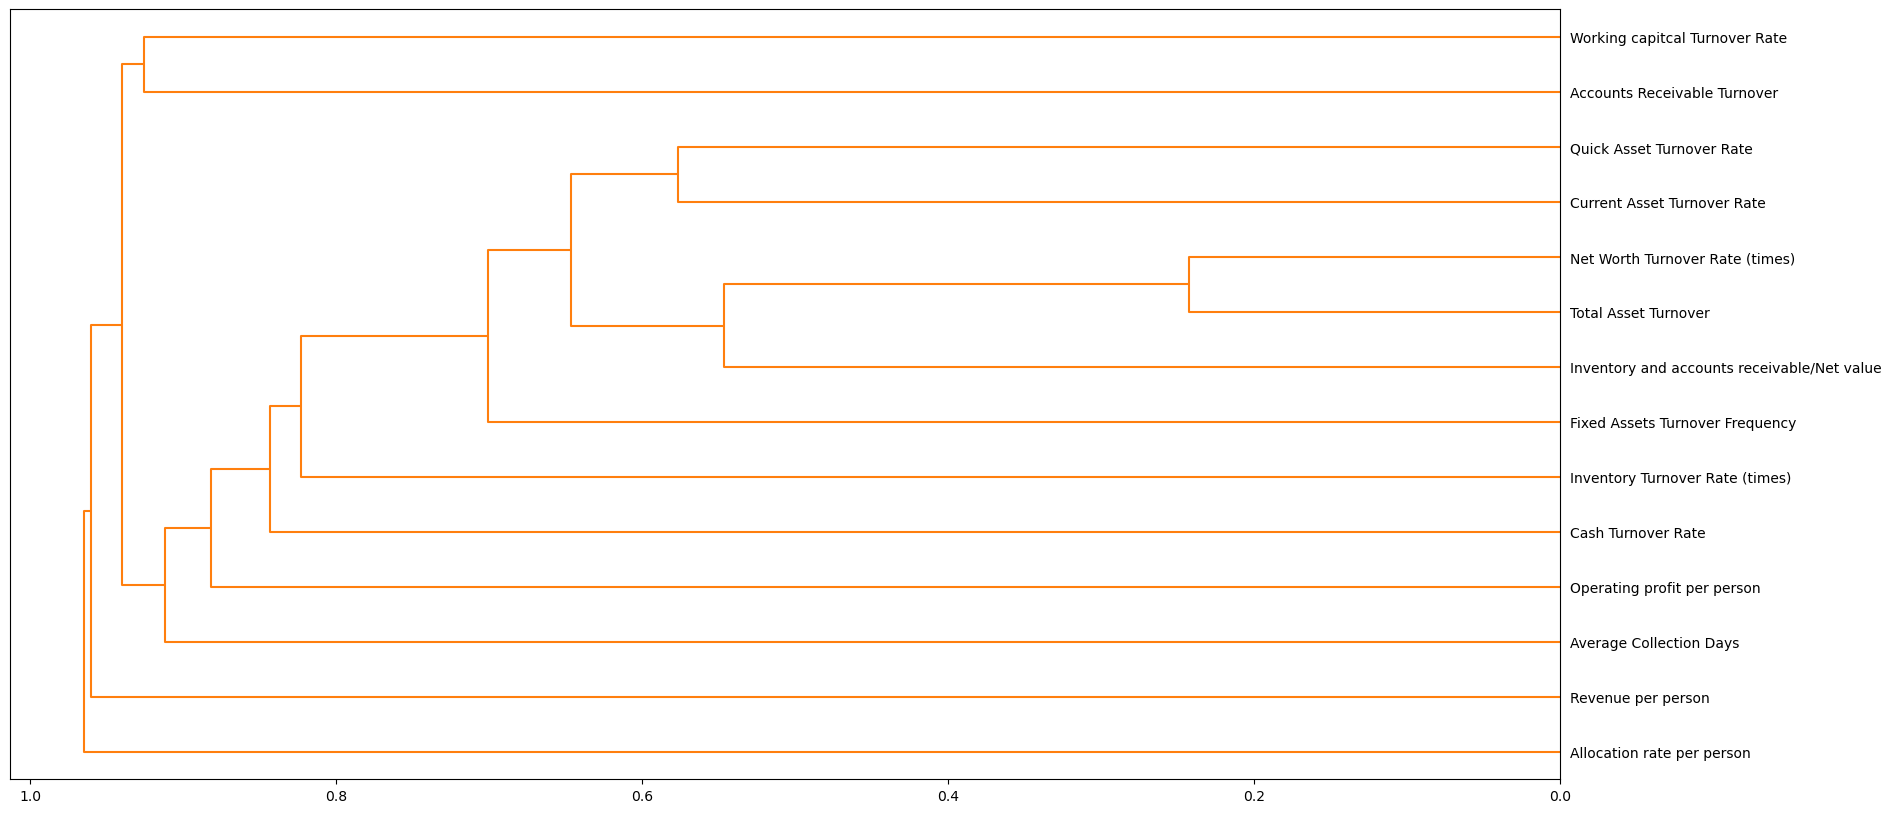

In [7]:
from sklearn.manifold import MDS
from src1.utils import plot_Shepard
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Méthode 1 : distance = 1 - |corrélation|
distance1 = 1-abs(corr)


aftd = MDS(n_components=2, dissimilarity='precomputed')
dist1 = aftd.fit_transform(distance1)
print(aftd.stress_)
plt.scatter(*dist1.T)
plt.title("AFTD avec distance = 1 - |corr|")
plt.show()
plot_Shepard(aftd)
plt.show()

cls = AgglomerativeClustering(metric="precomputed", linkage="single", n_clusters=None, distance_threshold=0).fit(distance1)
plt.figure(figsize=(20, 10))
plot_dendrogram(cls, color_threshold=1, labels=corr.columns, orientation="left")

In [8]:
data_solv['Bankrupt'] = data['Bankrupt?'].values
data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values

C:\Users\arthu\AppData\Local\Temp\ipykernel_26152\3523034060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Bankrupt'] = data['Bankrupt?'].values
C:\Users\arthu\AppData\Local\Temp\ipykernel_26152\3523034060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values


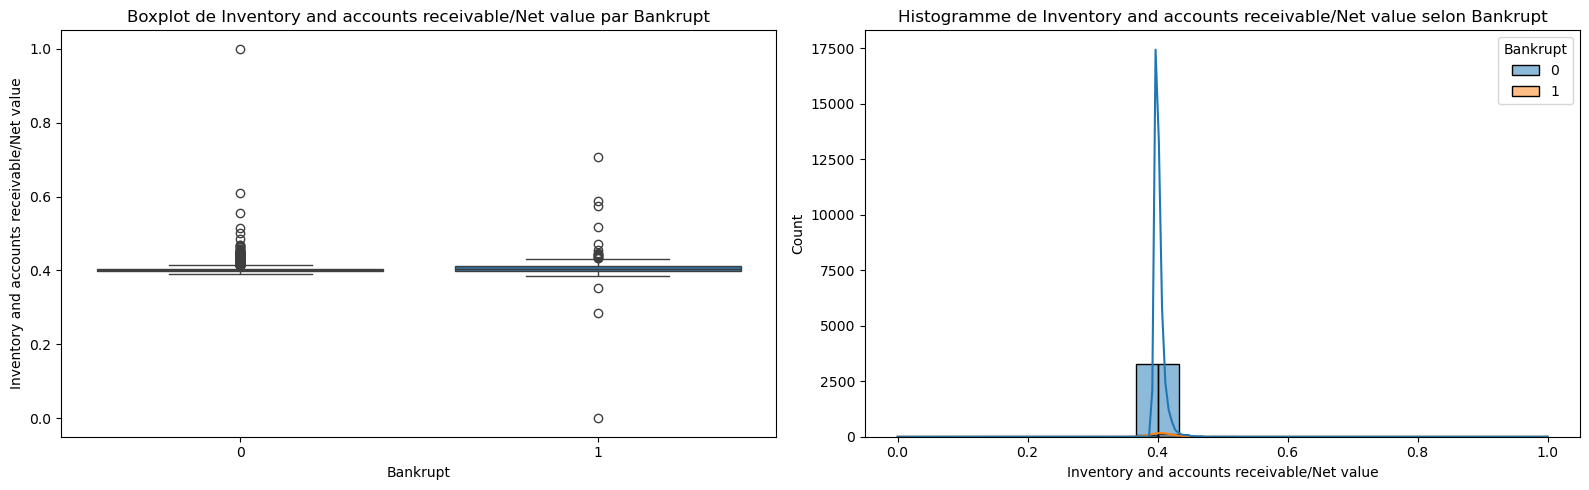

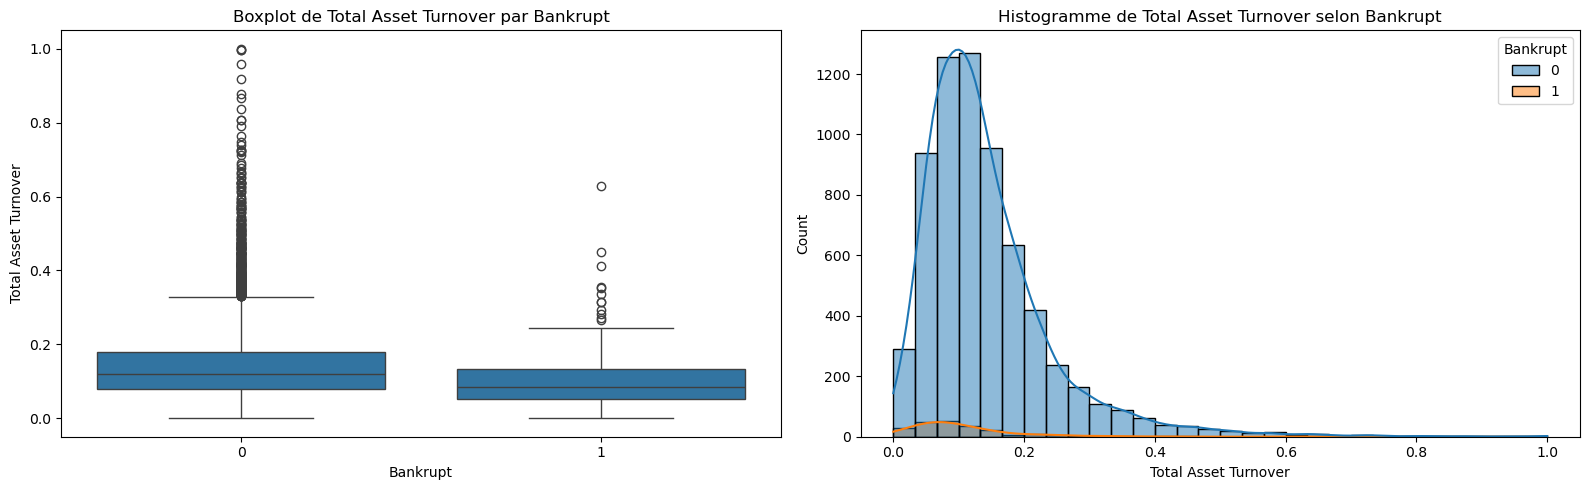

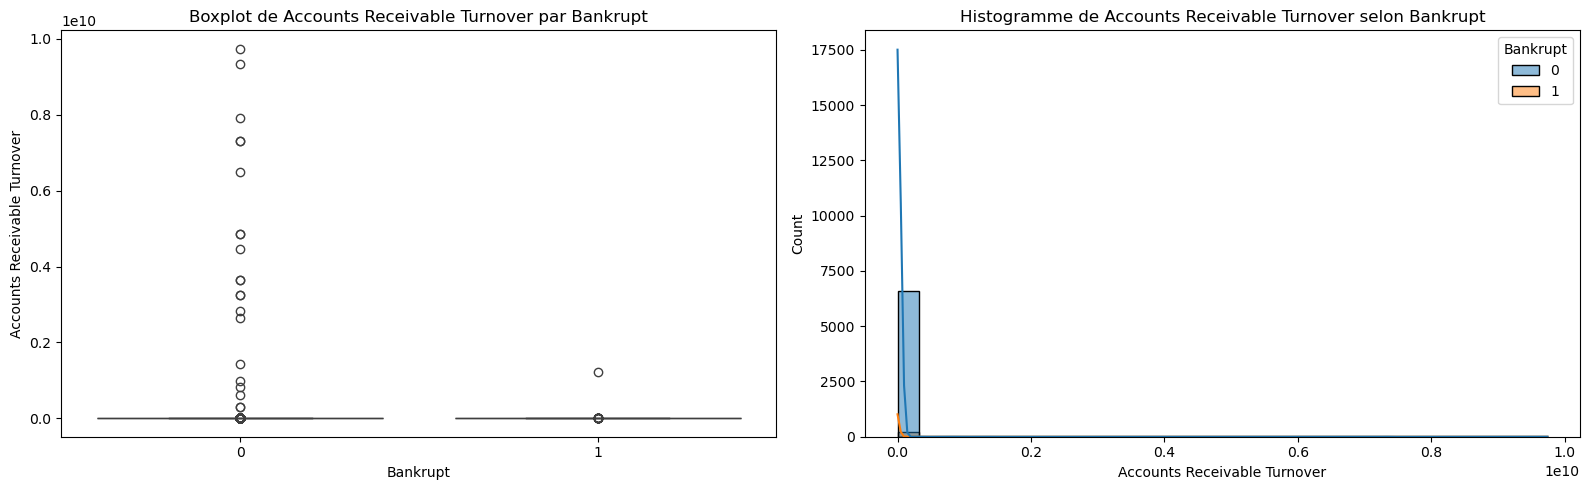

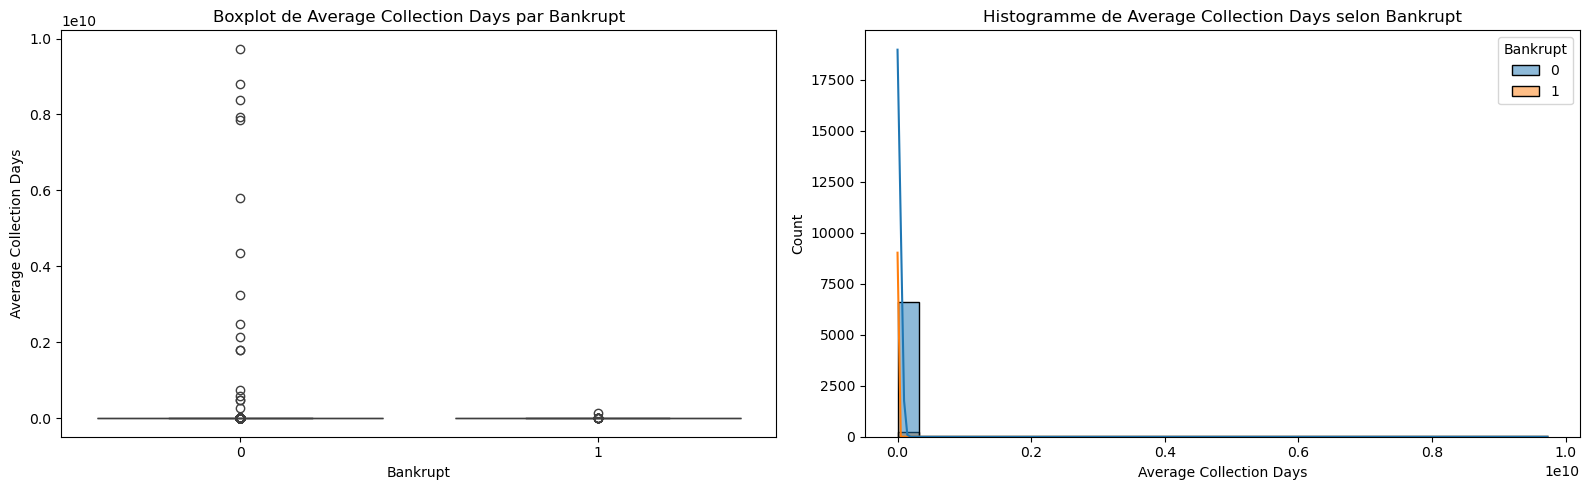

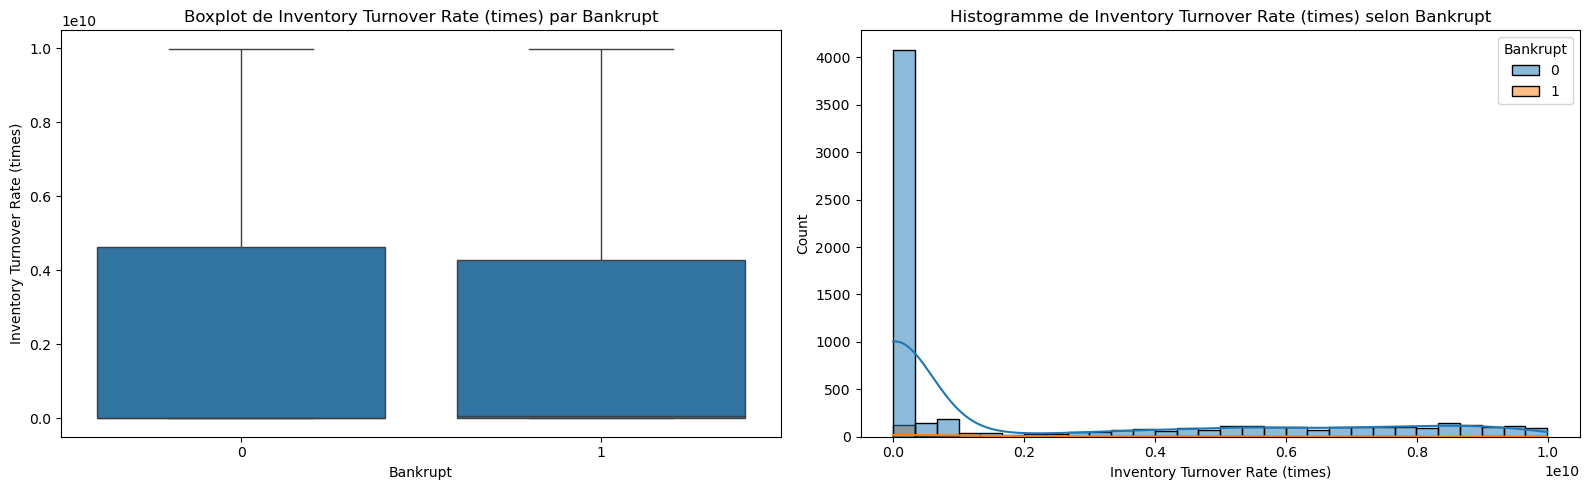

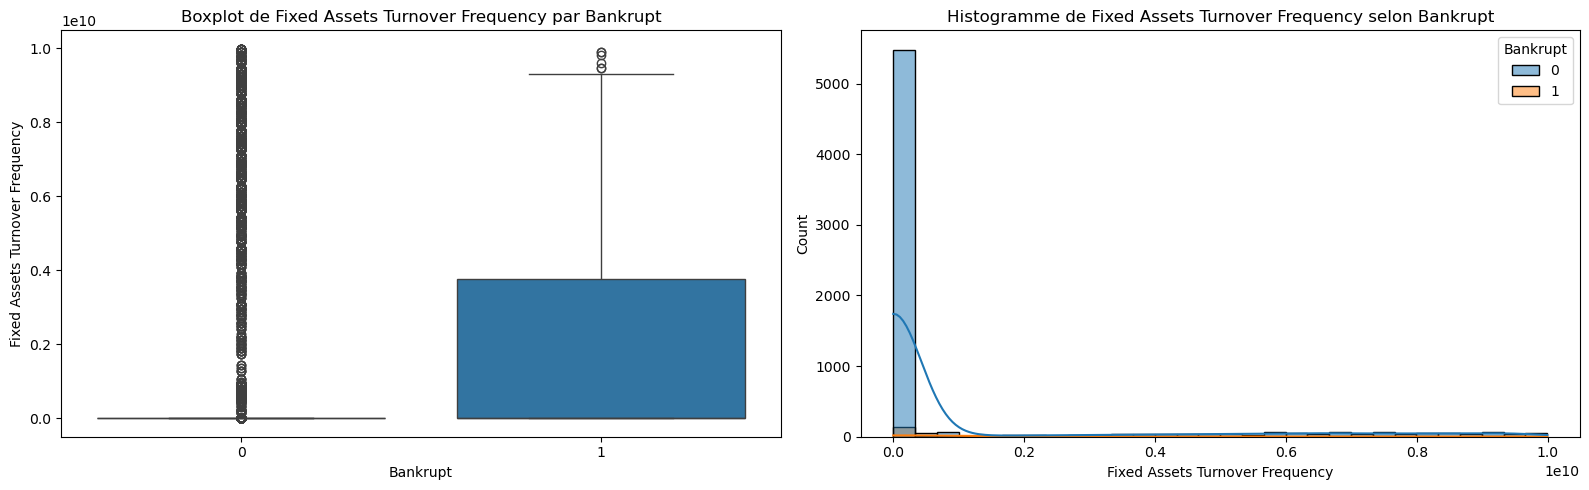

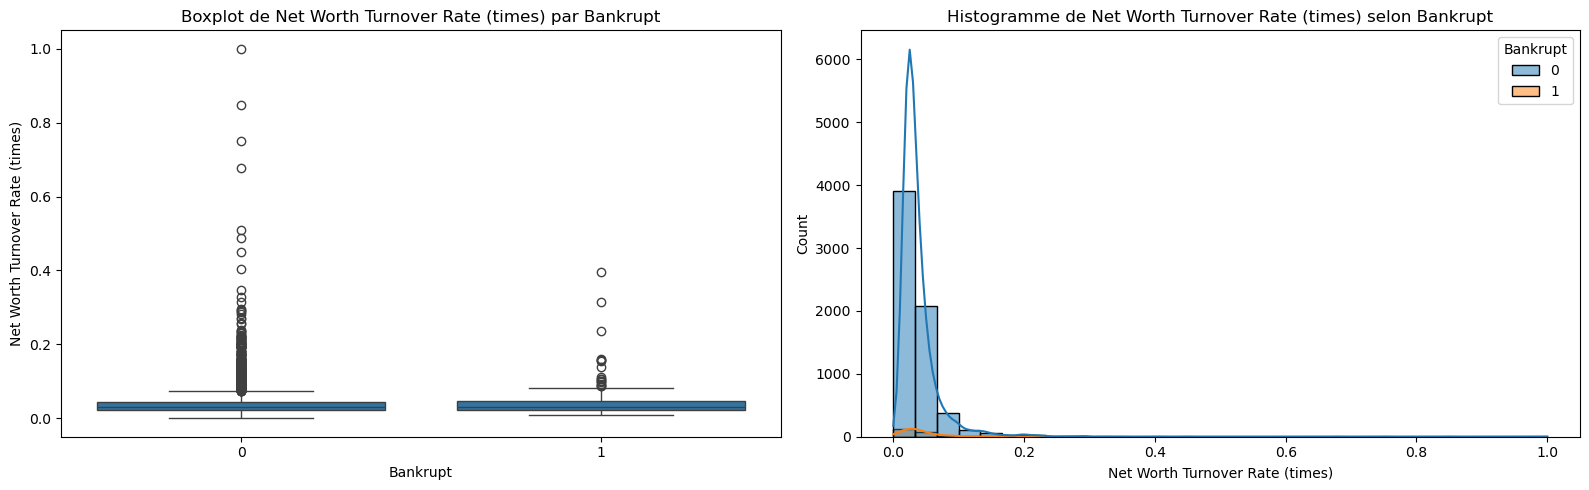

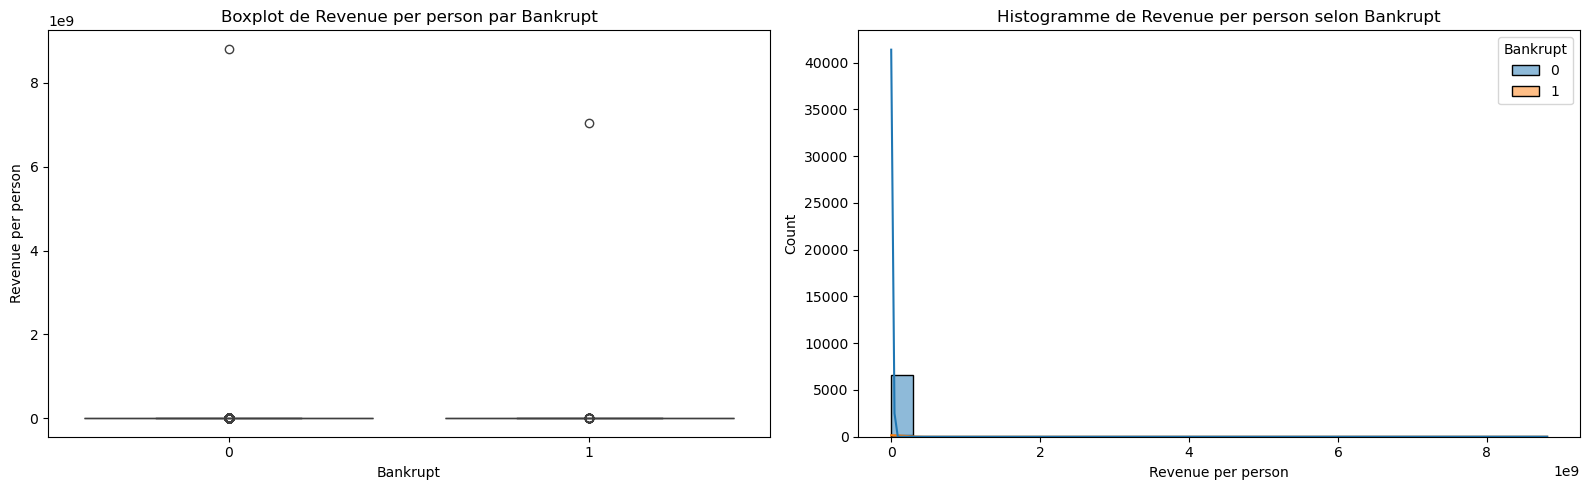

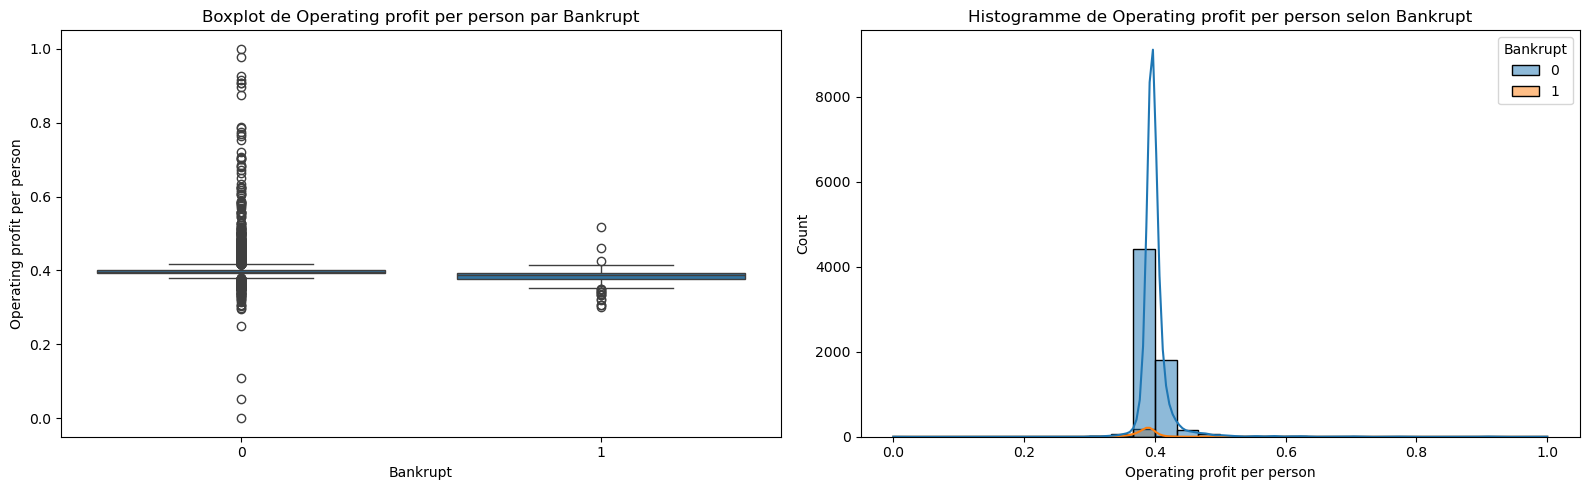

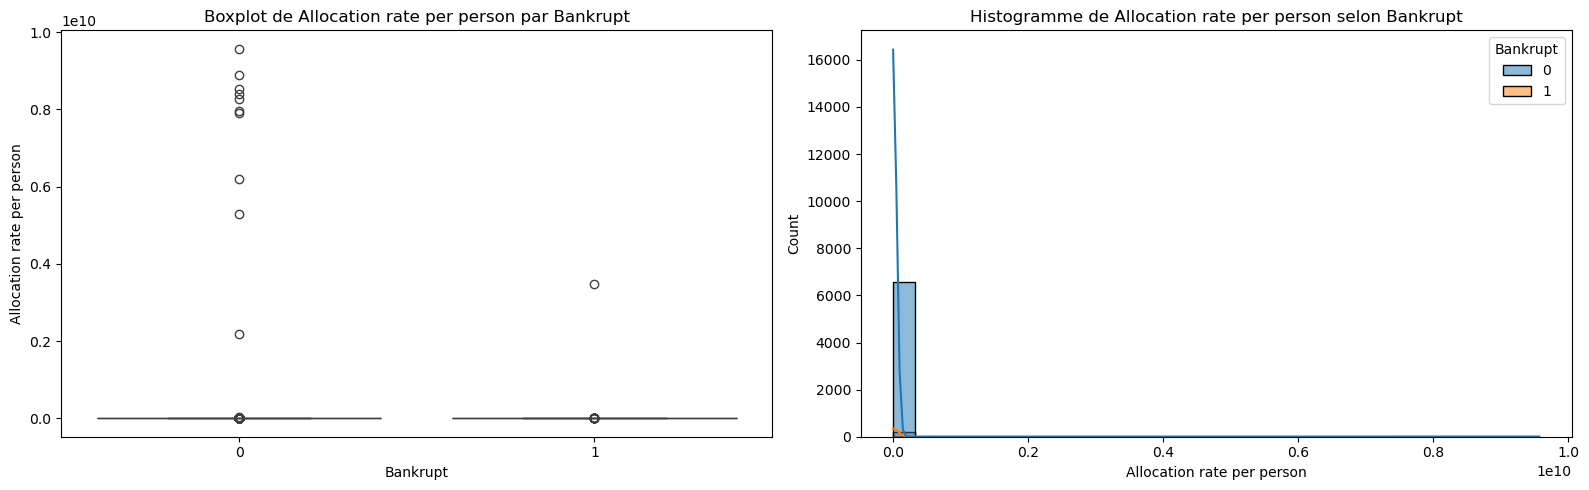

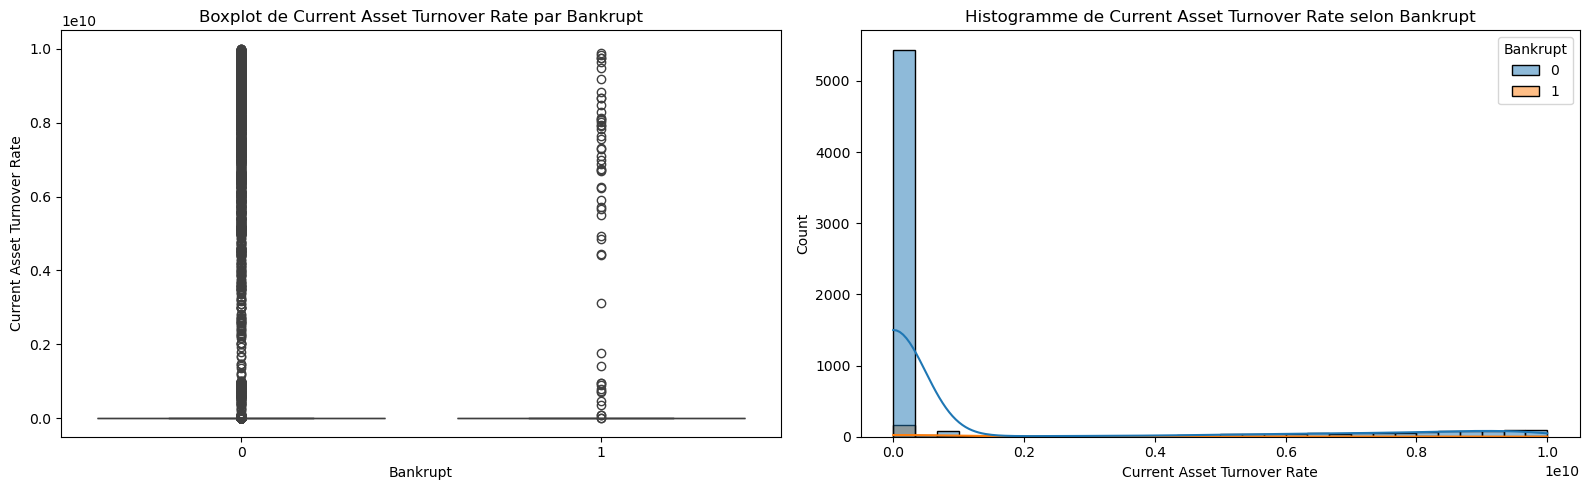

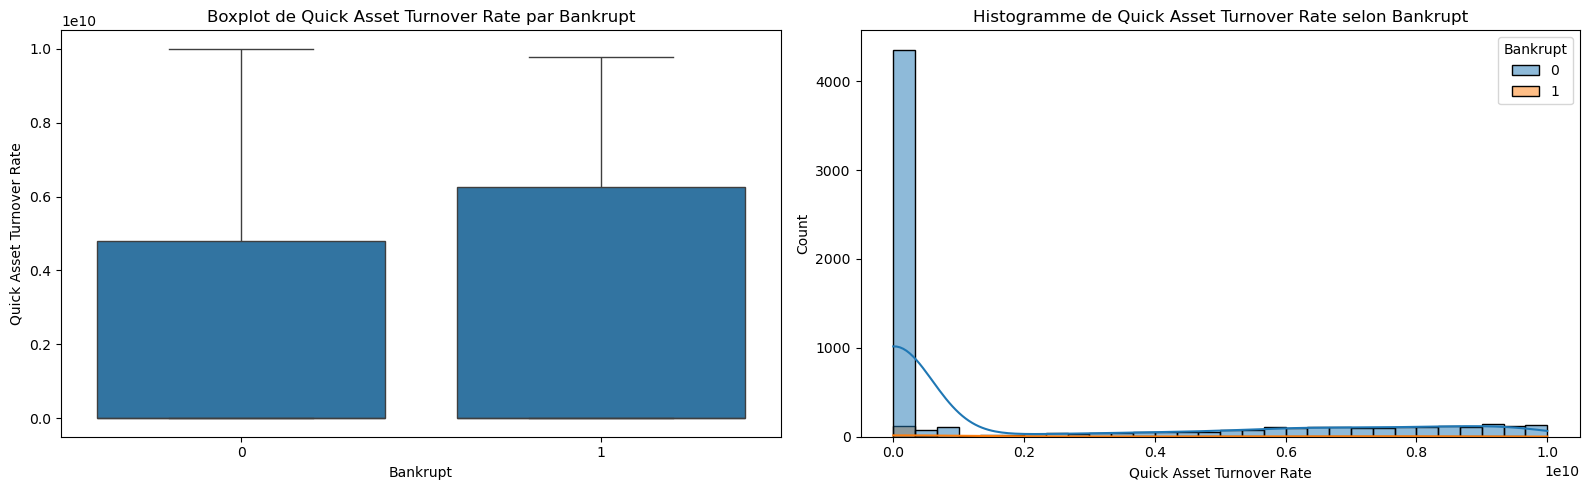

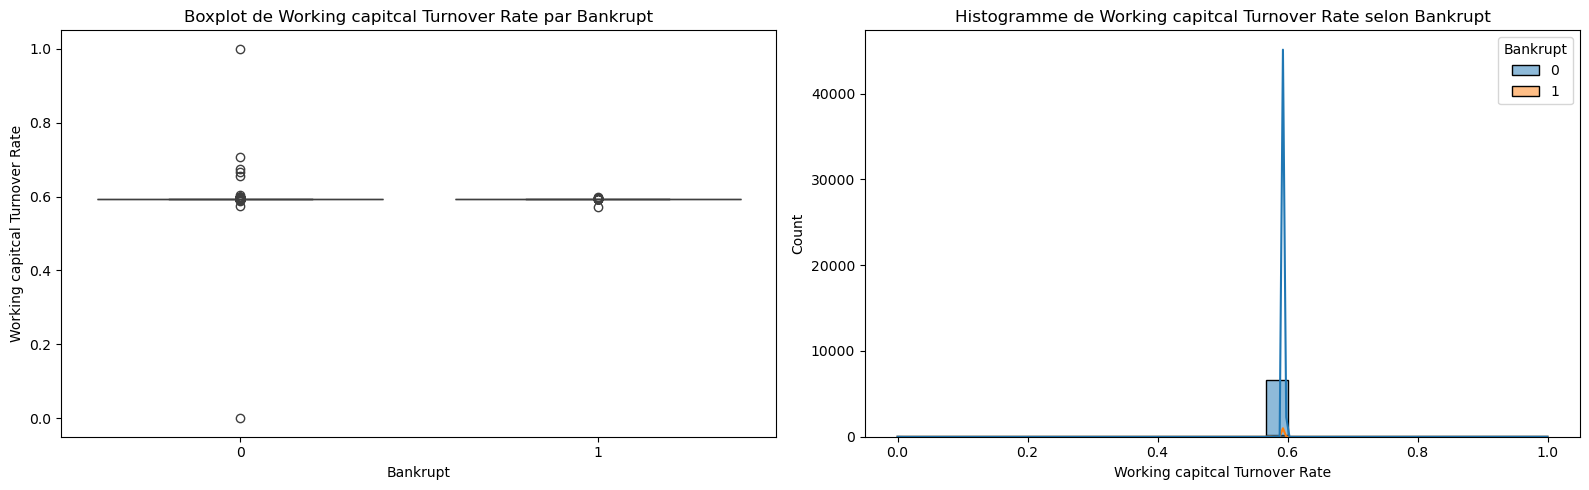

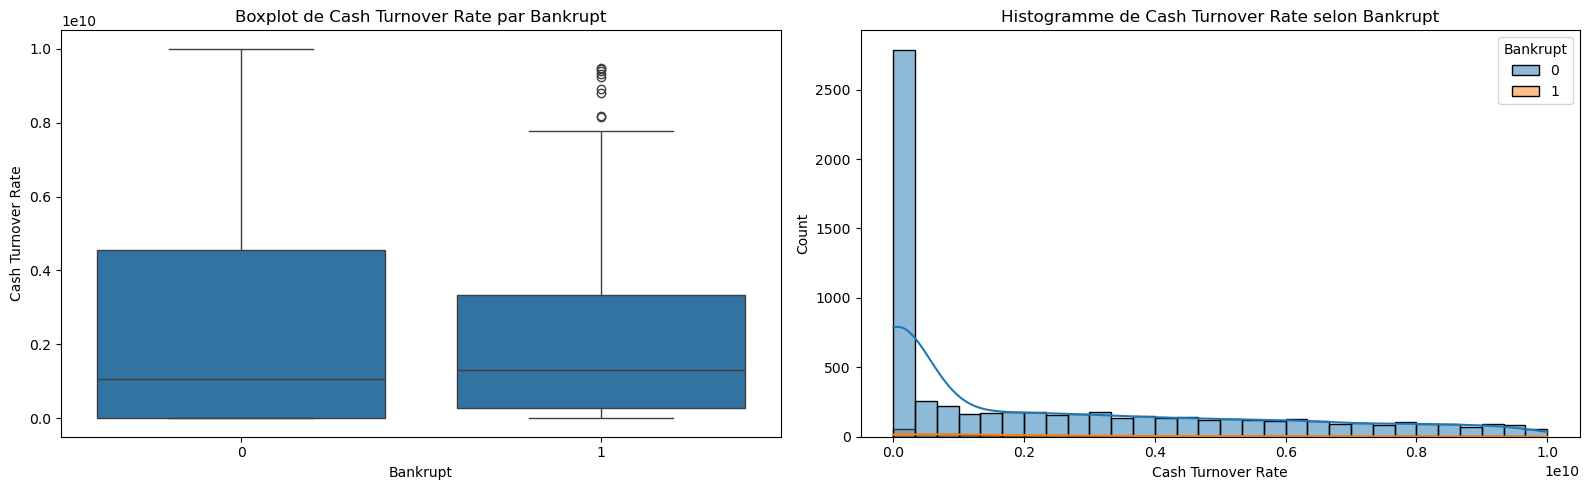

In [9]:
for col in efficacite:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(x='Bankrupt', y=col, data=data_solv, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col} par Bankrupt')

    # Histogramme
    sns.histplot(data=data_solv, x=col, hue='Bankrupt', kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Histogramme de {col} selon Bankrupt')

    plt.tight_layout()
    plt.show()


Possibilité de passer en variable qualitative les variables quantitatives suivantes : 
- Inventory Turnover Rate (times), 
- "Current Asset Turnover Rate",
- "Quick Asset Turnover Rate",
- "Cash Turnover Rate"
- Fixed Assets Turnover Frequency

Pour fair autre chose que de la recherche de faillite


### CAH sur les entreprises

In [11]:
data_quant = data[[col for col in data.columns if col in efficacite]]

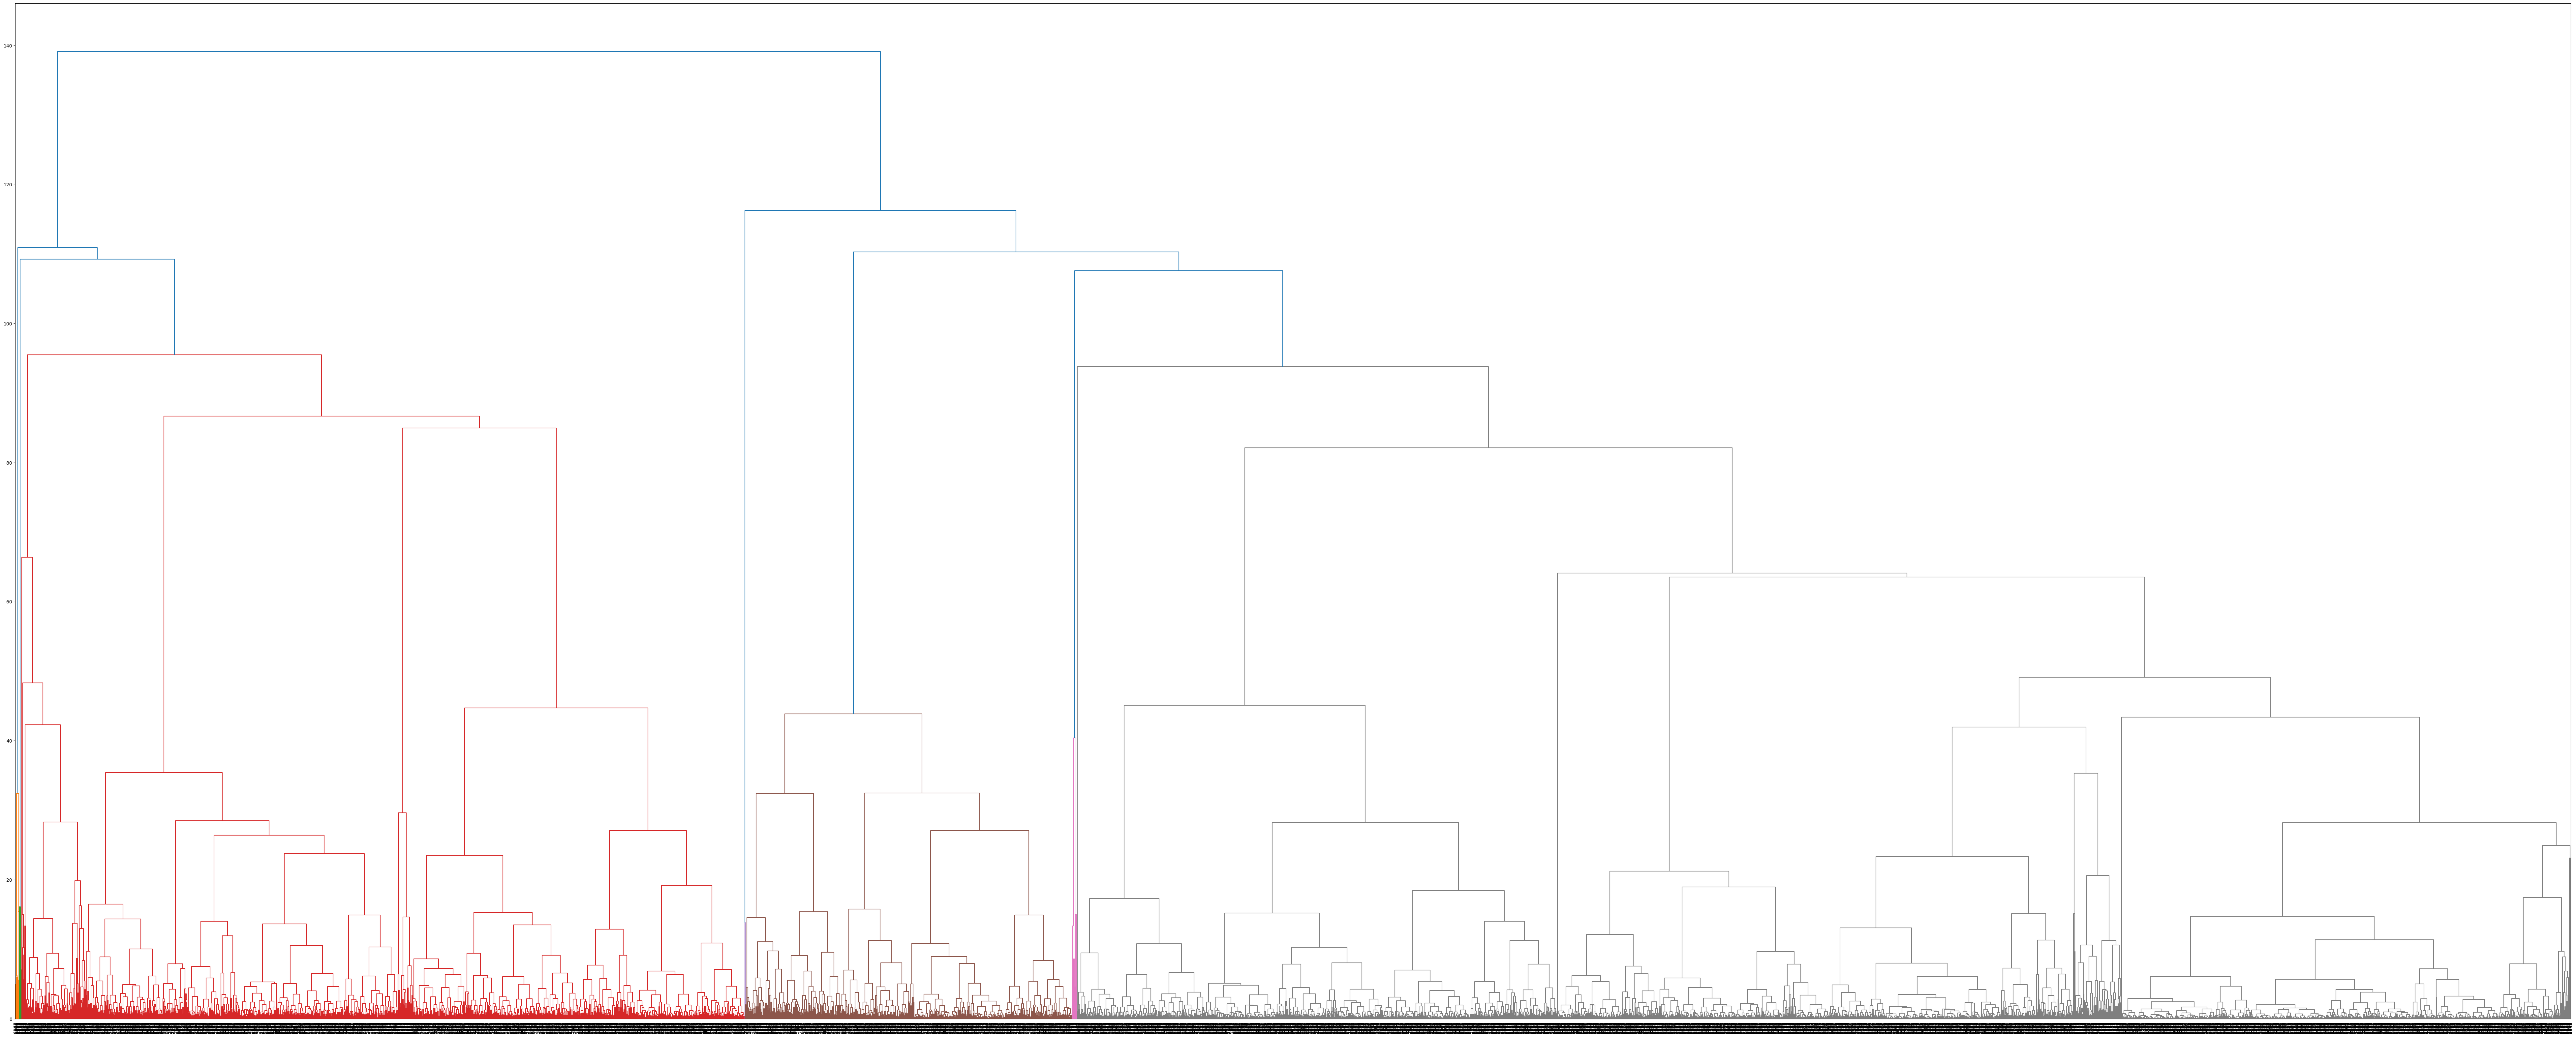

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Normalisation des variables numériques
norm = StandardScaler()
quantiative_norm = norm.fit_transform(data_quant)

cls = AgglomerativeClustering(metric="euclidean", linkage="ward", distance_threshold=0, n_clusters=None)
cls.fit(quantiative_norm)
plt.figure(figsize=(100, 40))
plot_dendrogram(cls)

On remarque 2 clusters

### AFTD sur les entreprises

In [14]:
# Prend trop de temps
#aftd = MDS(n_components=2, dissimilarity='euclidean')
#dist = aftd.fit_transform(quantiative_norm)
#print(aftd.stress_)
#plt.scatter(*dist.T)
#plt.show()

In [ ]:
#plot_Shepard(aftd)
#plt.show()

### ACP

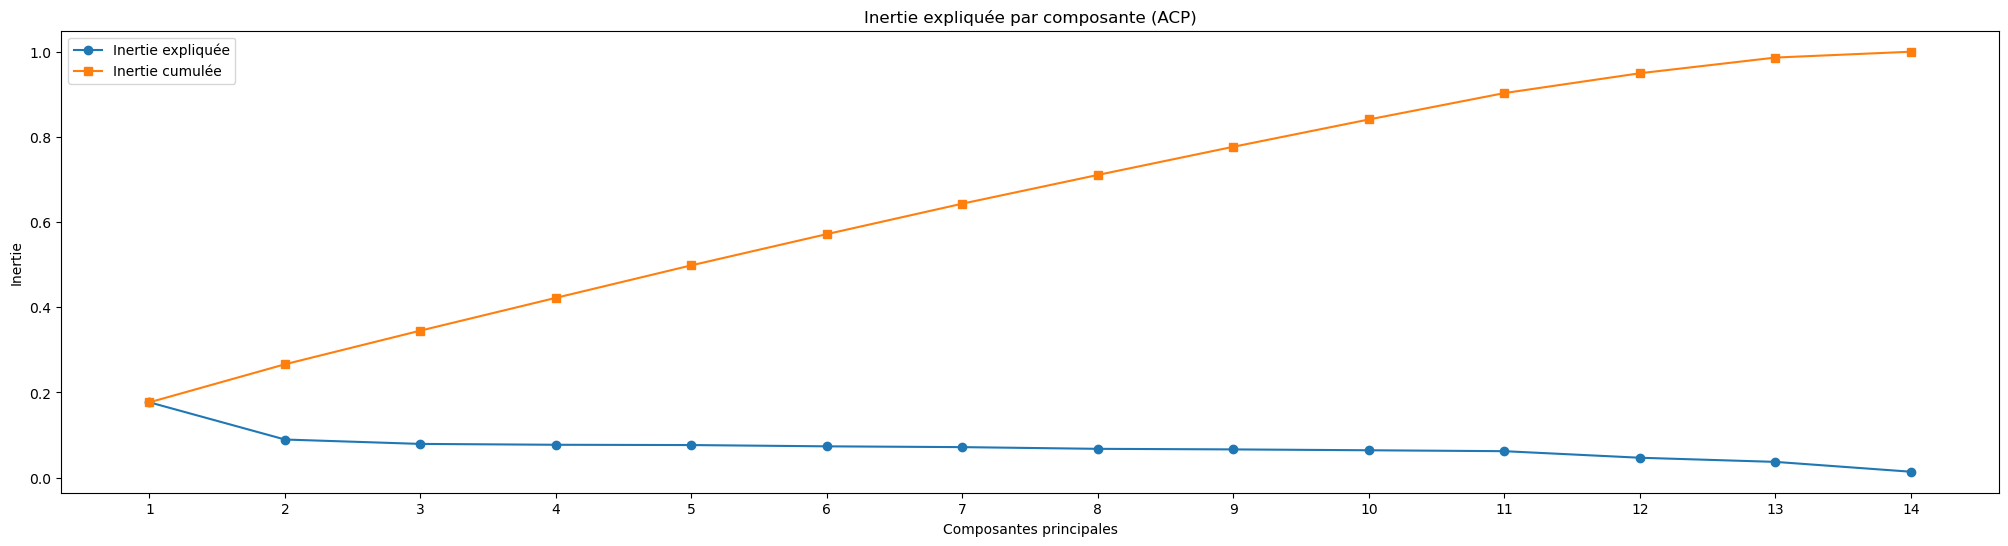

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cls = PCA()
pcs = cls.fit_transform(quantiative_norm)

# Inertie expliquée et cumulée
inertie_exp = cls.explained_variance_ratio_
cumul_inertie = inertie_exp.cumsum()

plt.figure(figsize=(25, 6))
plt.plot(range(1, len(inertie_exp) + 1), inertie_exp, marker='o', label="Inertie expliquée")
plt.plot(range(1, len(cumul_inertie) + 1), cumul_inertie, marker='s', label="Inertie cumulée")
plt.xticks(range(1, len(inertie_exp) + 1))
plt.xlabel("Composantes principales")
plt.ylabel("Inertie")
plt.title("Inertie expliquée par composante (ACP)")
plt.legend()

<Axes: xlabel='PC13', ylabel='PC14'>

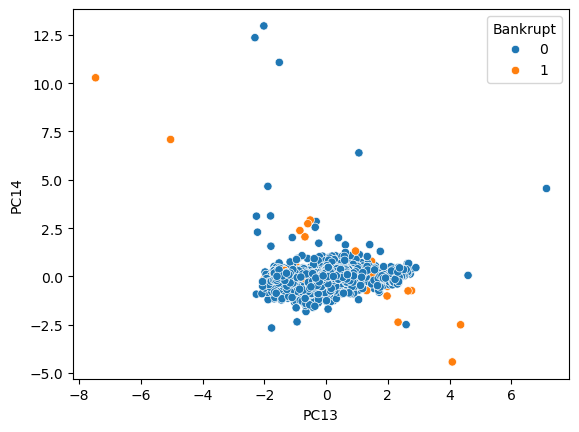

In [112]:
data_acp = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, len(inertie_exp)+1)])
data_acp['Bankrupt'] = data['Bankrupt?'].values
data_acp['Liability-Assets Flag']=data['Liability-Assets Flag'].values

sns.scatterplot(x="PC13", y="PC14" ,hue=data_acp.Bankrupt, data=data_acp)